In [1]:
#Importing the sklearn face of celbrity dataset
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)

In [2]:
#Importing all the necessary libraries for the CNN network and for the normal Logistic Regression
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, add, Activation, MaxPooling2D, Conv2D, Flatten, Dropout
from keras.layers.advanced_activations import LeakyReLU
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Verify the name of the celebrity and the shape of the input image
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)


In [4]:
#Creating the input X variable and the output y variable and creating a 8 vector matrix for the output variable
X = faces.images
y = faces.target
X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
y = y.reshape(X.shape[0], 1)

yy = pd.DataFrame(y)
yy.columns = ["Trgt"]
Y = pd.get_dummies(yy["Trgt"], prefix='target')
y=np.array(Y)

print(X.shape)
print(y.shape)
numclass=y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

(1560, 62, 47, 1)
(1560, 12)


In [5]:
#Convolutional Neural Network installation and establishing the other needed layers of Covolutional filters,
#MaxPoolng, Hidden layers and compilation layer

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='valid',input_shape=(62,47,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='linear',padding='valid'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='linear',padding='valid'))
model.add(LeakyReLU(alpha=0.1))                  
model.add(MaxPooling2D(pool_size=(2, 2),padding='valid'))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))           
model.add(Dropout(0.3))
model.add(Dense(numclass, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [6]:
#Model fit of the training dataset
H1 = model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=1, validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 3s 117ms/step - loss: 26.6752 - accuracy: 0.1653 - val_loss: 3.5065 - val_accuracy: 0.0520
Epoch 2/100
10/10 [==============================] - 0s 37ms/step - loss: 3.4353 - accuracy: 0.1453 - val_loss: 2.4549 - val_accuracy: 0.1200
Epoch 3/100
10/10 [==============================] - 0s 33ms/step - loss: 2.5499 - accuracy: 0.2004 - val_loss: 2.4840 - val_accuracy: 0.0800
Epoch 4/100
10/10 [==============================] - 0s 44ms/step - loss: 2.3901 - accuracy: 0.2455 - val_loss: 2.3964 - val_accuracy: 0.2120
Epoch 5/100
10/10 [==============================] - 0s 43ms/step - loss: 2.3570 - accuracy: 0.2645 - val_loss: 2.3615 - val_accuracy: 0.2960
Epoch 6/100
10/10 [==============================] - 0s 41ms/step - loss: 2.3190 - accuracy: 0.2575 - val_loss: 2.2970 - val_accuracy: 0.3400
Epoch 7/100
10/10 [==============================] - 0s 42ms/step - loss: 2.3086 - accuracy: 0.2846 - val_loss: 2.2450 - val_accuracy: 0.3440
Epoc

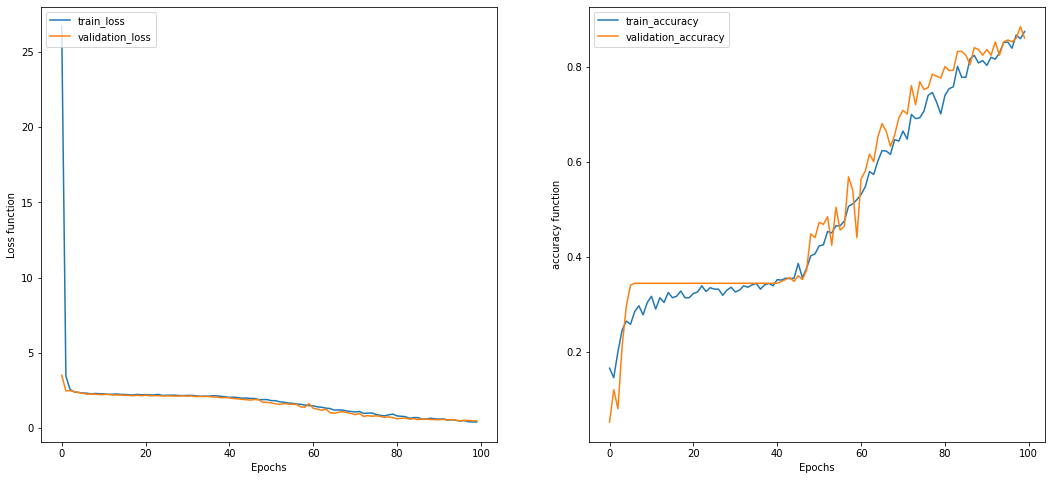

In [7]:
#Plotting the resultant loss and the accuracy of the training and validation model
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
plt.plot(H1.history["loss"], label='train_loss')
plt.plot(H1.history["val_loss"], label='validation_loss')
plt.xlabel("Epochs")
plt.ylabel("Loss function")
plt.legend(loc='upper left')
plt.subplot(1,2,2)
plt.plot(H1.history["accuracy"], label='train_accuracy')
plt.plot(H1.history["val_accuracy"], label='validation_accuracy')
plt.xlabel("Epochs")
plt.ylabel("accuracy function")
plt.legend(loc='upper left')
plt.show()

In [8]:
#Model Evaluation of test dataset acquring 95.3% accuracy
y_pred = model.predict(X_test)
print("The accuracy of the predicted value from the model against the test value:", (1-np.mean(np.abs(y_pred-y_test)))*100)
loss, accuracy = model.evaluate(X_test, y_test)
print("The loss value of the test dataset", loss)
print("The accuracy value of the test dataset:", accuracy*100)

The accuracy of the predicted value from the model against the test value: 96.82049416005611
10/10 [==============================] - 0s 7ms/step - loss: 0.6313 - accuracy: 0.8558
The loss value of the test dataset 0.631330668926239
The accuracy value of the test dataset: 85.57692170143127


In [9]:
n_samples, h, w = faces.images.shape
target_names = faces.target_names

In [10]:
y_test=np.argmax(y_test, axis=-1)
y_pred=np.argmax(y_pred, axis=-1)

In [11]:
y_pred.shape

(312,)

In [12]:
print(classification_report(y_test,y_pred,target_names=target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.91      0.80        11
     Colin Powell       0.85      0.95      0.90        55
  Donald Rumsfeld       0.68      0.76      0.72        25
    George W Bush       0.99      0.83      0.90       107
Gerhard Schroeder       0.82      0.86      0.84        21
      Hugo Chavez       0.83      0.71      0.77        14
   Jacques Chirac       0.64      1.00      0.78         7
    Jean Chretien       0.71      0.83      0.77        12
    John Ashcroft       0.85      0.92      0.88        12
Junichiro Koizumi       0.88      0.88      0.88         8
  Serena Williams       1.00      0.43      0.60         7
       Tony Blair       0.86      0.94      0.90        33

         accuracy                           0.86       312
        macro avg       0.82      0.83      0.81       312
     weighted avg       0.87      0.86      0.86       312



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


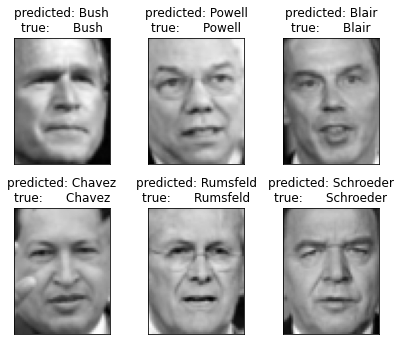

In [13]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=3):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    i=0
    k=0
    t=[]
    while(k<6):
        plt.subplot(n_row, n_col, k + 1)
        if(titles[i] in t):
          i=i+1
          continue
        else:
          plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
          plt.title(titles[i], size=12)
          plt.xticks(())
          plt.yticks(())
          t.append(titles[i])
          k=k+1
        i=i+1


# plot the result of the prediction on a portion of the test set

def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)

plt.show()